In [1]:
!pip install opencv-python numpy tensorflow

In [6]:
!wget -O big_buck_bunny.mp4 "http://commondatastorage.googleapis.com/gtv-videos-bucket/sample/BigBuckBunny.mp4"

--2025-10-01 10:16:08--  http://commondatastorage.googleapis.com/gtv-videos-bucket/sample/BigBuckBunny.mp4
Resolving commondatastorage.googleapis.com (commondatastorage.googleapis.com)... 192.178.163.207, 173.194.202.207, 173.194.203.207, ...
Connecting to commondatastorage.googleapis.com (commondatastorage.googleapis.com)|192.178.163.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158008374 (151M) [video/mp4]
Saving to: ‘big_buck_bunny.mp4’

big_buck_bunny.mp4  100%[===================>] 150.69M   299MB/s    in 0.5s    

2025-10-01 10:16:09 (299 MB/s) - ‘big_buck_bunny.mp4’ saved [158008374/158008374]



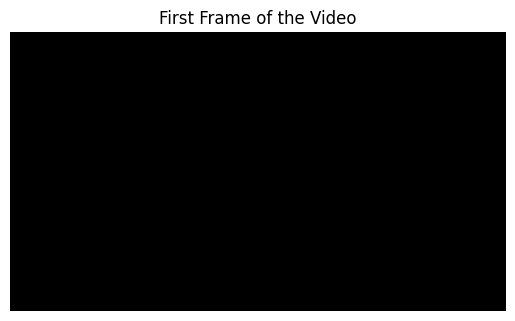

In [8]:
import cv2
import matplotlib.pyplot as plt

# Open the video file
video = cv2.VideoCapture('big_buck_bunny.mp4')

# Check if the video opened successfully
if not video.isOpened():
    print("Error: Could not open video file.")
else:
    # Read the first frame
    ret, frame = video.read()

    if ret:
        # Display the first frame
        # OpenCV reads in BGR format, Matplotlib expects RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        plt.title("First Frame of the Video")
        plt.axis('off')
        plt.show()
    else:
        print("Error: Could not read the first frame.")

# Release the video file
video.release()

In [9]:
import cv2

# Open the video file
video = cv2.VideoCapture('big_buck_bunny.mp4')

# Check if the video opened successfully
if not video.isOpened():
    print("Error: Could not open video file.")
else:
    # Get the video's properties (width, height, FPS)
    frame_width = int(video.get(3))
    frame_height = int(video.get(4))
    fps = int(video.get(cv2.CAP_PROP_FPS))

    # Process each frame of the video
    while True:
        # Read a frame
        ret, frame = video.read()

        # If the frame was not read successfully, we have reached the end of the video
        if not ret:
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # You can add more processing here (e.g., object detection)
        # For now, we'll just print a message to show that it's working
        # print("Processing a frame...")

# Release the video file
video.release()
print("Video processing finished.")

Video processing finished.


In [10]:
import cv2
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# Load a pre-trained object detection model from TensorFlow Hub
# This might take a while to download the first time
model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

# Define the labels for the objects the model can detect
labels = {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck'}
# Note: The model can detect many other things, but we'll focus on these for clarity

# Open the video file
video = cv2.VideoCapture('big_buck_bunny.mp4')
if not video.isOpened():
    print("Error: Could not open video file.")
else:
    # Get video properties
    frame_width = int(video.get(3))
    frame_height = int(video.get(4))
    fps = int(video.get(cv2.CAP_PROP_FPS))

    # Define the output video writer
    # The output video will have the same properties as the input
    out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

    print("Processing video...")
    while True:
        # Read a frame from the video
        ret, frame = video.read()
        if not ret:
            break

        # Convert the frame to a TensorFlow tensor
        rgb_tensor = tf.convert_to_tensor(frame, dtype=tf.uint8)
        rgb_tensor = tf.expand_dims(rgb_tensor, 0)

        # Run the object detection model on the frame
        detector_output = model(rgb_tensor)

        # Process the model's output
        detection_boxes = detector_output['detection_boxes'][0].numpy()
        detection_classes = detector_output['detection_classes'][0].numpy().astype(np.int32)
        detection_scores = detector_output['detection_scores'][0].numpy()

        # Loop through the detected objects
        for i in range(len(detection_scores)):
            score = detection_scores[i]
            if score > 0.5:  # Filter for detections with a confidence score > 50%
                box = detection_boxes[i]
                class_id = detection_classes[i]

                ymin, xmin, ymax, xmax = box

                # Convert normalized coordinates to pixel coordinates
                y_min = int(ymin * frame_height)
                x_min = int(xmin * frame_width)
                y_max = int(ymax * frame_height)
                x_max = int(xmax * frame_width)

                # Draw a bounding box around the detected object
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

                # Get the label and score
                label = f"{labels.get(class_id, 'Unknown')}: {score:.2f}"

                # Put the label text on the frame
                cv2.putText(frame, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Write the processed frame to the output video
        out.write(frame)

    # Release resources
    video.release()
    out.release()
    print("Video processing and object detection finished.")

Processing video...
Video processing and object detection finished.
